In [1]:
!pip install transformers datasets sklearn accelerate -U


  Using cached datasets-2.19.1-py3-none-any.whl (542 kB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from transformers import RobertaTokenizer, RobertaForSequenceClassification, TrainingArguments, Trainer
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load and prepare your dataset
df = pd.read_csv('/content/NFR_CSV.csv',encoding='ISO-8859-1')

# Split the dataset
train_df, test_df = train_test_split(df, test_size=0.2)


In [ ]:
from transformers import RobertaTokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Load and prepare your dataset
df = pd.read_csv('/content/NFR_CSV.csv', encoding='ISO-8859-1')

# Assuming the labels column is named 'class_name' and text column is 'sentence'
df.dropna(subset=['class_name'], inplace=True)

# Split the dataset in a stratified manner
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['class_name'])

# Initialize the tokenizer
tokenizer = RobertaTokenizer.from_pretrained('microsoft/codebert-base')

def encode_sentences(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=128, return_tensors="pt")

# Encode the sentences
train_encodings = encode_sentences(train_df['sentence'].tolist())
test_encodings = encode_sentences(test_df['sentence'].tolist())

# Combine labels from both training and test datasets
all_labels = pd.concat([train_df['class_name'], test_df['class_name']])

# Initialize and fit the LabelEncoder on all labels
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

# Transform the labels for both training and test datasets
train_labels = label_encoder.transform(train_df['class_name'])
test_labels = label_encoder.transform(test_df['class_name'])

print("Training set labels:", train_labels)
print("Test set labels:", test_labels)


In [6]:
# Initialize the tokenizer
tokenizer = RobertaTokenizer.from_pretrained('microsoft/codebert-base')

def encode_sentences(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=128, return_tensors="pt")

# Encode the sentences
train_encodings = encode_sentences(train_df['sentence'].tolist())
test_encodings = encode_sentences(test_df['sentence'].tolist())


In [7]:
# Combine labels from both training and test datasets
all_labels = pd.concat([train_df['class_name'], test_df['class_name']])

# Initialize and fit the LabelEncoder on all labels
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

# Transform the labels for both training and test datasets
train_labels = label_encoder.transform(train_df['class_name'])
test_labels = label_encoder.transform(test_df['class_name'])

print("Training set labels:", train_labels)
print("Test set labels:", test_labels)

Training set labels: [5 8 4 8 9 3 9 8 5 9 8 8 5 5 8 4 4 1 5 9 8 4 4 8 5 9 7 8 8 8 4 8 8 9 5 8 5
 9 8 8 9 8 8 8 8 4 5 8 9 8 3 8 3 8 4 8 8 8 3 4 5 8 8 4 8 1 8 4 8 8 9 4 9 4
 8 4 5 8 4 8 9 9 5 8 8 4 8 8 4 9 8 3 4 3 8 5 9 3 3 8 7 8 1 4 5 8 8 8 4 4 8
 4 9 9 8 8 3 8 3 9 8 5 9 8 5 8 4 8 8 8 5 4 3 3 8 4 8 5 3 5 9 8 4 3 5 9 4 5
 8 4 8 8 9 8 5 5 9 5 8 4 5 8 4 8 4 3 5 4 3 8 8 3 5 8 1 8 8 5 9 3 9 8 3 1 9
 9 5 8 8 8 3 4 9 9 5 8 8 9 9 5 4 8 8 5 8 8 8 9 8 5 8 4 8 3 8 8 8 8 4 3 8 9
 5 3 8 8 8 4 6 9 3 8 8 5 7 8 8 9 8 8 3 3 8 8 3 8 8 9 8 8 8 4 8 5 3 8 4 8 8
 4 3 8 3 9 5 4 8 3 3 5 4 3 8 8 3 3 4 3 8 9 4 8 5 5 9 8 5 8 5 8 8 4 8 4 3 4
 5 4 8 5 4 4 9 3 8 9 4 8 4 5 5 3 3 7 3 8 4 9 5 8 9 8 3 8 8 8 5 3 3 1 8 4 4
 9 5 8 5 3 9 5 3 5 9 5 4 8 8 3 3 1 5 3 4 9 8 9 4 8 9 8 9 8 8 1 9 8 8 3 4 4
 5 8 3 5 9 5 5 3 6 8 8 9 4 9 4 3 8 8 5 8 8 8 8 8 9 3 8 4 5 3 9 8 4 8 9 3 1
 4 9 3 8 3 3 8 9 9 8 9 4 3 3 8 5 8 4 4 9 3 8 8 8 4 3 8 1 8 4 5 5 6 8 5 4 8
 8 3 8 5 4 4 8 4 3 9 5 8 8 8 4 9 4 9 8 9 8 3 8 8 4 8 4 9 4 8 4 7 3 3 3 5 4
 9 9

In [9]:
class NFRDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NFRDataset(train_encodings, train_labels)
test_dataset = NFRDataset(test_encodings, test_labels)


In [10]:
pip install transformers[torch]

In [11]:
!pip install accelerate -U


In [12]:
!pip install accelerate>=0.21.0 -U


In [13]:
import accelerate
print(accelerate.__version__)


0.30.1


In [14]:
num_labels = len(label_encoder.classes_)  # This is equivalent to df['class_name'].nunique()

model = RobertaForSequenceClassification.from_pretrained('microsoft/codebert-base', num_labels=num_labels)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
pip install  torch sklearn pandas matplotlib seaborn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [16]:
import torch


In [17]:
!pip install transformers[torch] accelerate -U

In [18]:

from sklearn.metrics import precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

# Trainer initialization
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Training the model
trainer.train()

# Evaluating the model
evaluation_results = trainer.evaluate()

Step,Training Loss


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# # Prepare metrics for CSV and printing
# metrics = {
#     "Precision": evaluation_results['eval_precision'],
#     "Recall": evaluation_results['eval_recall'],
#     "F1 Score": evaluation_results['eval_f1']
# }

# # Writing metrics to CSV
# metrics_filename = 'evaluation_metrics.csv'
# with open(metrics_filename, mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(["Metric", "Value"])
#     for key, value in metrics.items():
#         writer.writerow([key, value])

# # Printing metrics
# for metric, value in metrics.items():
#     print(f"{metric}: {value}")

# # Evaluating the model
# evaluation_results = trainer.evaluate()
print(evaluation_results)

{'eval_loss': 0.6038013696670532, 'eval_precision': 0.8450313580819534, 'eval_recall': 0.8385416666666666, 'eval_f1': 0.8284366408121085, 'eval_runtime': 75.6328, 'eval_samples_per_second': 2.539, 'eval_steps_per_second': 0.317, 'epoch': 3.0}


In [20]:
# # def predict(sentence):
# #     inputs = tokenizer(sentence, padding=True, truncation=True, max_length=128, return_tensors="pt")
# #     outputs = model(**inputs)
# #     predictions = torch.argmax(outputs.logits, dim=1)
# #     return label_encoder.inverse_transform(predictions.numpy())[0]

# # # Example usage
# # print(predict("Software should easy to use."))

# def predict():
#     # Prompt the user to enter a sentence
#     sentence = input("Enter a sentence to classify: ")
#     inputs = tokenizer(sentence, padding=True, truncation=True, max_length=128, return_tensors="pt")
#     outputs = model(**inputs)
#     predictions = torch.argmax(outputs.logits, dim=1)
#     # Return the predicted class name
#     return label_encoder.inverse_transform(predictions.numpy())[0]

# # Call the predict function which now includes a user prompt
# print(predict())



In [21]:
# def predict(sentence):
#     inputs = tokenizer(sentence, padding=True, truncation=True, max_length=128, return_tensors="pt")
#     outputs = model(**inputs)
#     predictions = torch.argmax(outputs.logits, dim=1)
#     return label_encoder.inverse_transform(predictions.numpy())[0]

# # Example usage
# print(predict("Software should easy to use."))

def predict():
    # Prompt the user to enter a sentence
    sentence = input("Enter a sentence to classify: ")
    inputs = tokenizer(sentence, padding=True, truncation=True, max_length=128, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    scores = torch.softmax(logits, dim=1).numpy()[0]  # Convert logits to probabilities

    # Print prediction scores for each class
    print("Prediction scores:")
    for score, label in zip(scores, label_encoder.classes_):
        print(f"{label}: {score:.4f}")

    # Get the predicted class index
    predicted_index = np.argmax(scores)

    # Retrieve the predicted class name
    predicted_class_name = label_encoder.inverse_transform([predicted_index])[0]

    print("Predicted class:", predicted_class_name)

# Call the predict function to test
predict()

Enter a sentence to classify: The system should perform well
Prediction scores:
Compatibility: 0.0138
Fault Tolerance: 0.0457
Legal: 0.0130
Maintainability: 0.0266
Operability: 0.0294
Performance: 0.5234
Portability: 0.0207
Scalability: 0.0220
Security: 0.0192
Usability: 0.2863
Predicted class: Performance


In [22]:
print(label_encoder.classes_)

['Compatibility' 'Fault Tolerance' 'Legal' 'Maintainability' 'Operability'
 'Performance' 'Portability' 'Scalability' 'Security' 'Usability']


#Confusion matrices

In [23]:
# Predict on the evaluation dataset
predictions = trainer.predict(test_dataset)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# Extract the predicted labels
preds = np.argmax(predictions.predictions, axis=1)

# True labels are part of the predictions object
labels = predictions.label_ids


In [25]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for each class
cm = confusion_matrix(labels, preds)


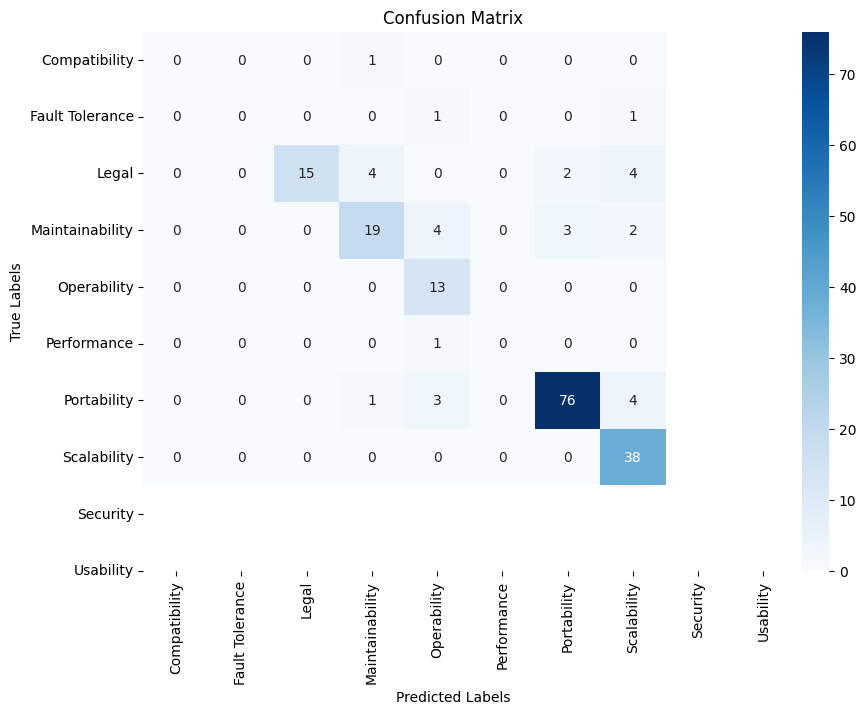

In [26]:
def plot_confusion_matrix(cm, class_names, figsize=(10, 7)):
    # Plotting the confusion matrix as a heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.xticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=90)
    plt.yticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=0)
    plt.title('Confusion Matrix')
    plt.show()

# Get the class names from the label encoder
class_names = label_encoder.classes_

# Plot the confusion matrix
plot_confusion_matrix(cm, class_names)


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix


In [28]:
# Calculate the multilabel confusion matrix
cm = multilabel_confusion_matrix(labels, preds)


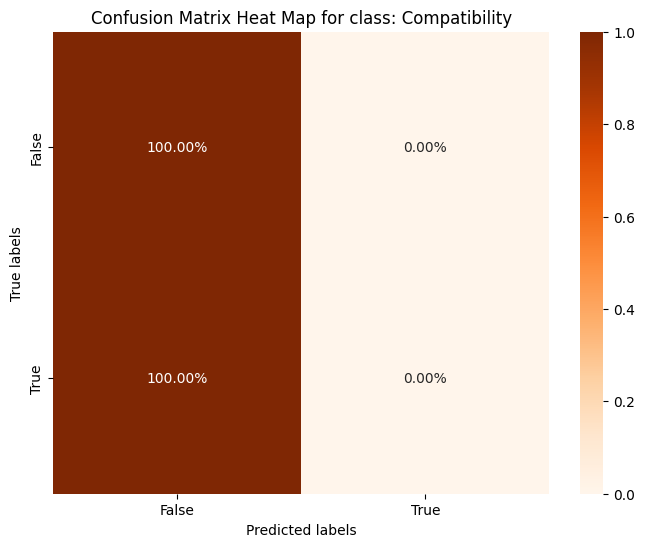

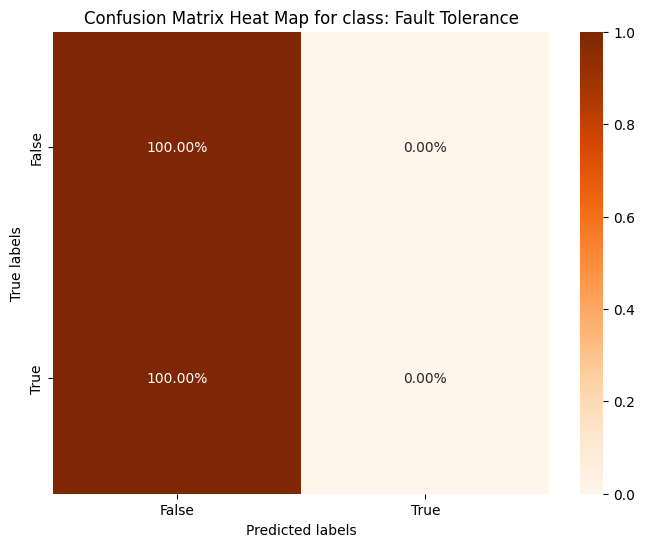

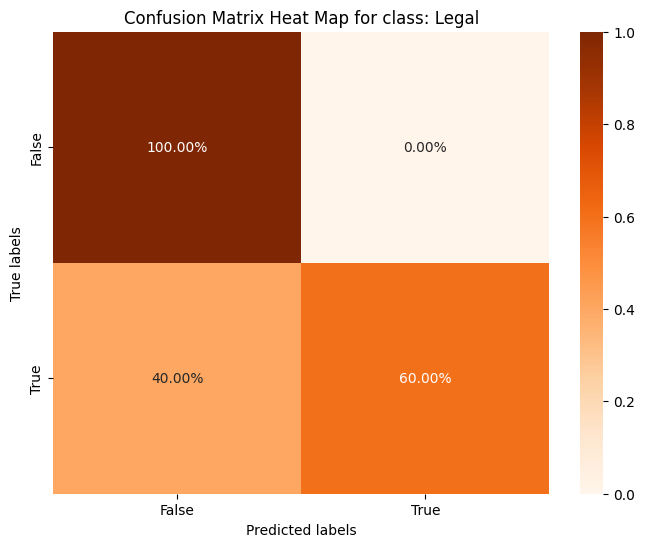

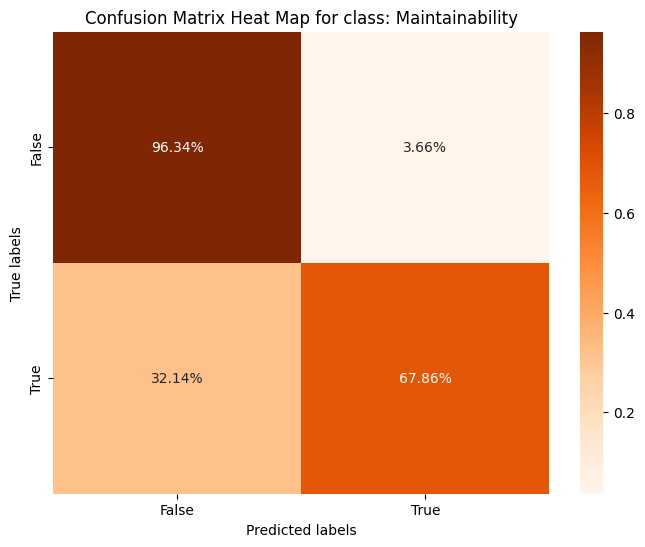

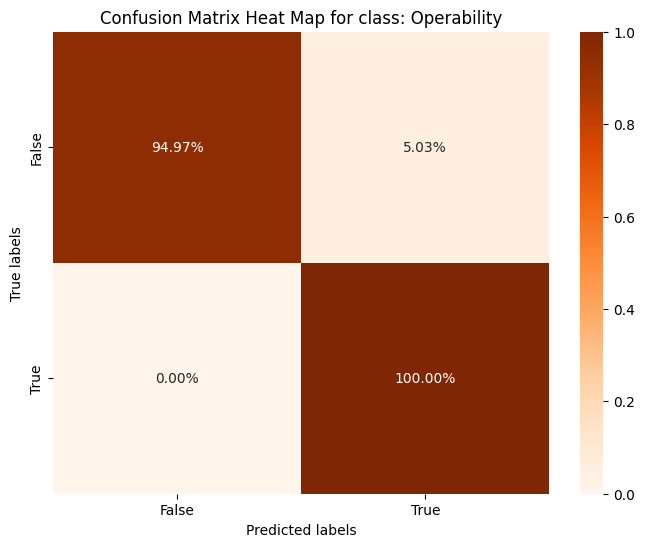

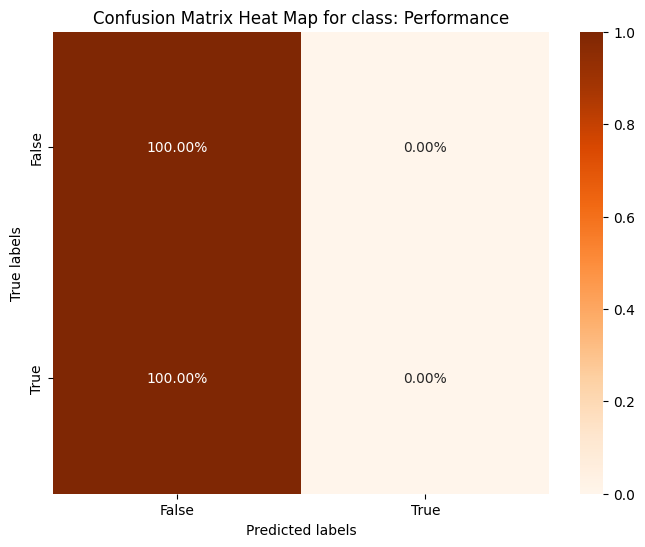

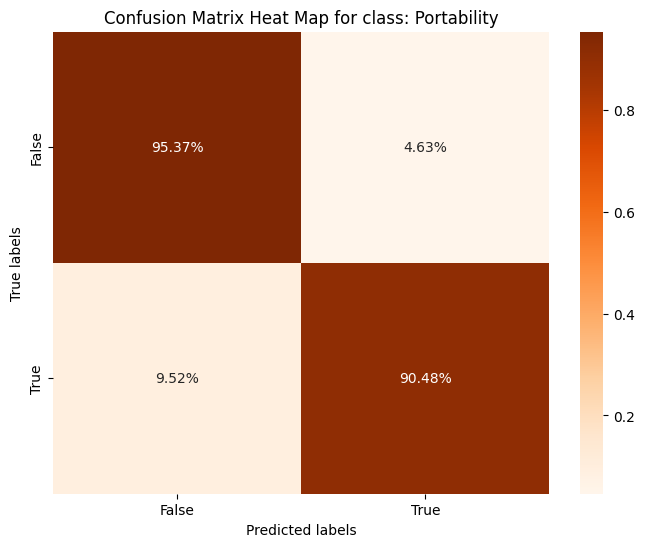

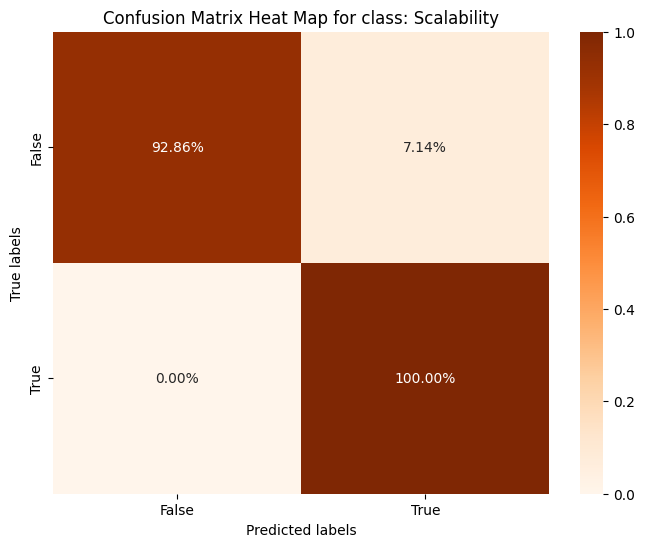

In [29]:
def plot_confusion_matrix_per_class(cm, class_names):
    for i, matrix in enumerate(cm):
        # Calculate percentage for each section in the confusion matrix
        cm_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
        cm_normalized = np.nan_to_num(cm_normalized)  # Replace NaN with 0

        # Plotting the heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Oranges')

        # Setting the labels and titles
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title(f'Confusion Matrix Heat Map for class: {class_names[i]}')
        plt.xticks(ticks=[0.5, 1.5], labels=['False', 'True'])
        plt.yticks(ticks=[0.5, 1.5], labels=['False', 'True'])
        plt.show()

# Class names for your dataset
class_names = label_encoder.classes_  # Make sure label_encoder is fitted with class names

# Assuming cm and class_names are already defined
plot_confusion_matrix_per_class(cm, class_names)
